<a href="https://colab.research.google.com/github/rushmila/machine_learning/blob/main/Silhouette_score_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


KMeans(n_clusters=3, n_init='auto', random_state=0) Silhouette score:  0.6901586958919508
Best score:  0.7069535268866294
[KMeans(n_clusters=2, n_init='auto', random_state=0), KMeans(n_clusters=3, n_init='auto', random_state=0), KMeans(n_clusters=4, n_init='auto', random_state=0), KMeans(n_clusters=5, n_init='auto', random_state=0), KMeans(n_clusters=6, n_init='auto', random_state=0), KMeans(n_clusters=7, n_init='auto', random_state=0), KMeans(n_init='auto', random_state=0), KMeans(n_clusters=9, n_init='auto', random_state=0)]
[0.4897248119907599, 0.6901586958919508, 0.7069535268866294, 0.6522125334935149, 0.5731027297895599, 0.5056862595611255, 0.5041434217450271, 0.5013396970341815]
[0.7069535268866294, 4]
0.7069535268866294
best_k:  4


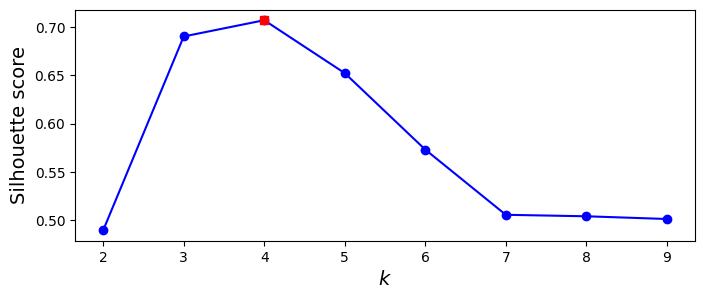

In [6]:
import numpy as np
import os
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns

def get_data():
    raw_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/data/dataset_clustering.csv') # in case of csv data
    return raw_data


data_frame = get_data()


kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(data_frame)

from sklearn.metrics import silhouette_score

score_3 = silhouette_score(data_frame, kmeans.labels_) #metric='euclidean'

print(kmeans, "Silhouette score: ", score_3)
print('====================')

## All the silhouette scores
K = range(2, 10)
fits = []
score = []
model_score = []
df = pd.DataFrame()

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(data_frame)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(data_frame, model.labels_, metric='euclidean'))

    ##
    ss = silhouette_score(data_frame, model.labels_)

    model_score.append([ss, model.n_clusters])

best_index = np.argmax(score)
best_k = K[best_index]
best_score = score[best_index]

m = np.array(model_score).argmax()
print('Best score: ', max(score))
print(fits)
print(score)

a = np.argmax(model_score, axis=0)
print(max(model_score))
print(best_score)
# sns.lineplot(x = K, y = score)

plt.figure(figsize=(8, 3))
plt.plot(K, score, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
#plt.show()
plt.savefig('Silhouette_score.png')

print("best_k: ", best_k)
